### Recently I published a self help book titled Inspiration: Thoughts on Spirituality, Technology, Wealth, Leadership and Motivation. The preview of the book can be read from the Amazon link https://lnkd.in/gj7bMQA

KNN is a supervised machine learning algorithm.It can be used to classification of data set.Here I will be sharing code for implementing kNN and share some tricks for KNN.The dataset contains the Age,salary and the decision to purchase a particular Car.We will be using KNN to predict if a particular person will buy a car.The notebook will cover following topics 

1.Data Import and Preprocessing 

2.Exploratory Data Analysis 

3.Model Built 

4.Model Evaluation 

5.Optimum Value of k 

6.Conclusion 

### To can refer to my other notebooks from https://www.kaggle.com/binuthomasphilip/code

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


# 1.Data Import and Preprocessing 

### Importing Python Modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
plt.style.use('fivethirtyeight')

To can refer to my other notebooks from https://www.kaggle.com/binuthomasphilip/code

### Importing Dataset

In [3]:
dataset=pd.read_csv('../input/social-network-ads/Social_Network_Ads.csv')
dataset.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


So we have the User ID, Gender,Age,Salary and the data if Purchase made by a used.

### Summary of Dataset

In [4]:
print('Rows     :',dataset.shape[0])
print('Columns  :',dataset.shape[1])
print('\nFeatures :\n     :',dataset.columns.tolist())
print('\nMissing values    :',dataset.isnull().values.sum())
print('\nUnique values :  \n',dataset.nunique())

Rows     : 400
Columns  : 5

Features :
     : ['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']

Missing values    : 0

Unique values :  
 User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64


### Describing the Data

In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


We can see that mean age is arounf 37

Mean estimated salary is 69742 $

# 2.Exploratory Data Analysis 

## Gender

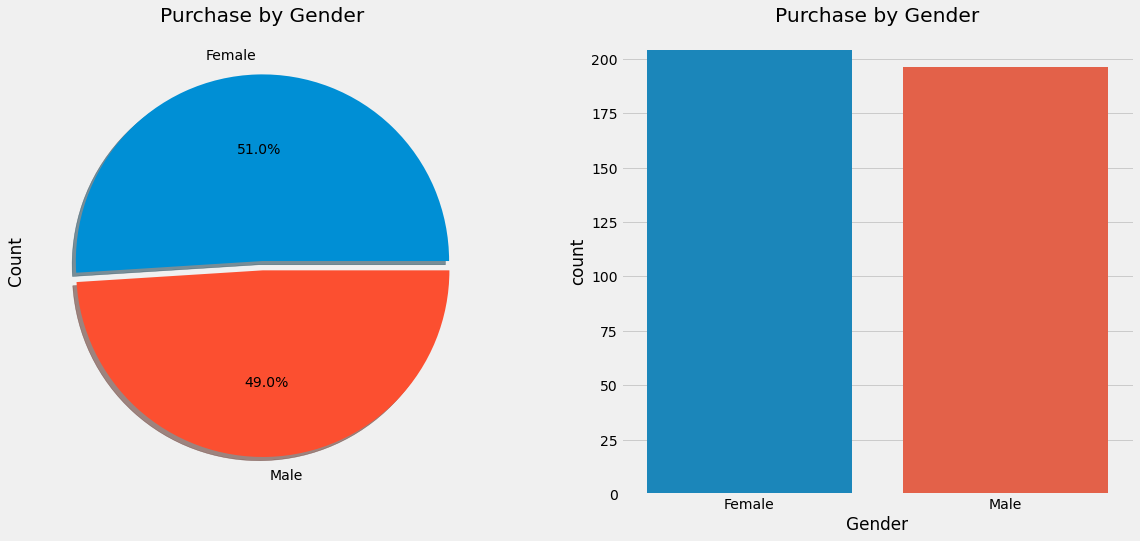

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['Gender'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Purchase by Gender')
ax[0].set_ylabel('Count')
sns.countplot('Gender',data=dataset,ax=ax[1],order=dataset['Gender'].value_counts().index)
ax[1].set_title('Purchase by Gender')
plt.show()

Data is almost even between Male and Female with sligh inclination towards female

### Estimated Salary Distribution

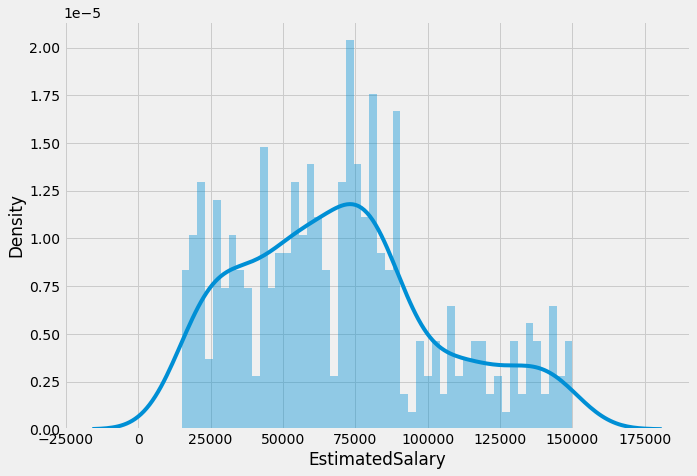

In [7]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.distplot(dataset['EstimatedSalary'],kde=True,bins=50);

We can see like mean salary of the population is arond 75000 $.

### Purchase Distribution

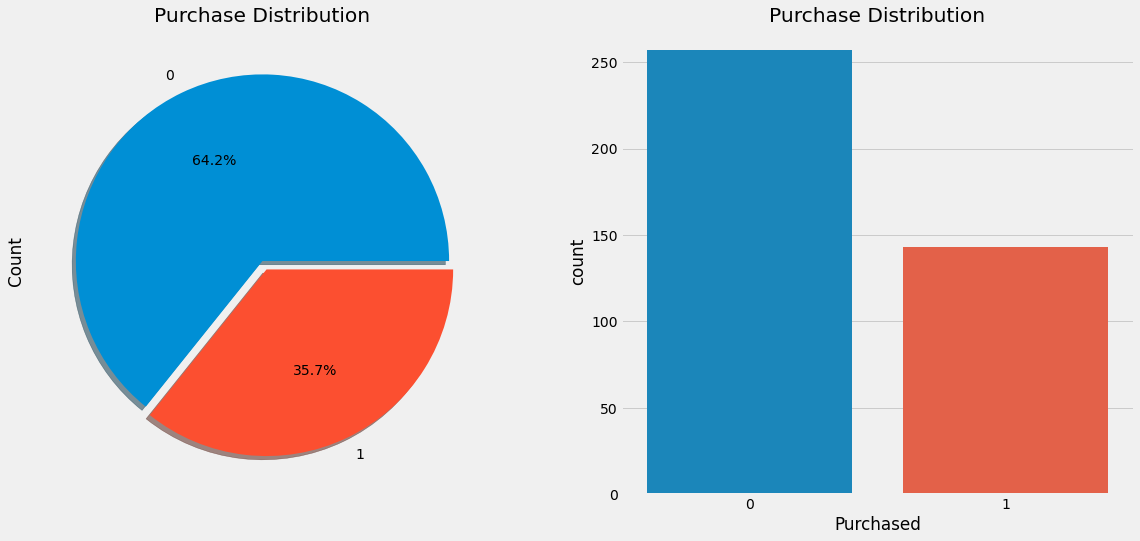

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['Purchased'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Purchase Distribution')
ax[0].set_ylabel('Count')
sns.countplot('Purchased',data=dataset,ax=ax[1],order=dataset['Purchased'].value_counts().index)
ax[1].set_title('Purchase Distribution')
plt.show()

So Most people in the dataset have not brough the car.All our attempts should be towards selling more cars.

# 3.Model Built

### Generating Matrix of Features

In [9]:
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

### Test Train Split

In [10]:
from sklearn.model_selection import train_test_split   #cross_validation doesnt work any more
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 
#X_train

### Feature Scaling 

In [11]:
from sklearn.preprocessing import StandardScaler 
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)
#X_train

### KNN Model Fitting

In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=1,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

### Predicting Test Results

In [13]:
y_pred=classifier.predict(X_test)

# 4.Model Evaluation

### Confusion Matrix

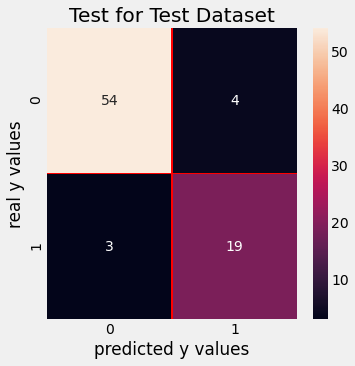

In [14]:
#from sklearn.metrics import confusion_matrix  #Class has capital at the begining function starts with small letters 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

### Accoracy Score

In [15]:
print(accuracy_score(y_test,y_pred))

0.9125


Correct predictions =54+21=78

Wrong predictions =1+4=5

Accuracy = (78/83)*100 =93.97 %

### Classification Report

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        58
           1       0.83      0.86      0.84        22

    accuracy                           0.91        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.91      0.91      0.91        80



### Visualising the Training Set Results

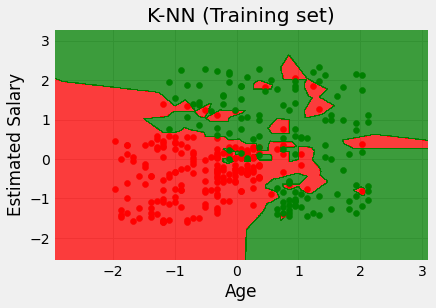

In [17]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

### Visualizing the Test Result

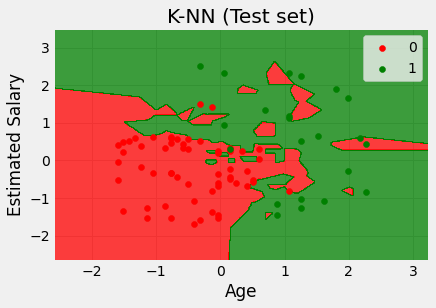

In [18]:

from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Red area represent the people who didnt buy the car.Green area represent people who brought the car.We can see that the accuracy level obtained is greater than thats we might have obtained by other Algorithms like Logistic Regression.

# 5.Optimum Value of K 

In [19]:
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

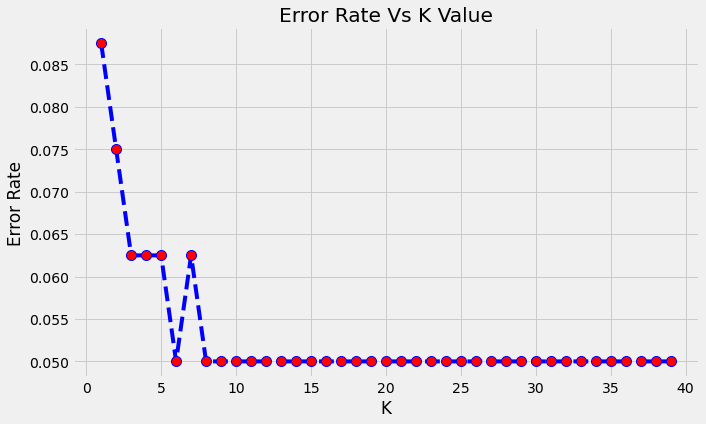

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate Vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

So here we have plotted the change in error with different values of K.We can see that with k=5 we do get a very low value of Error.So we can make a model with K=5 and see the results.

### Building Model with K=5

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [22]:
y_pred=classifier.predict(X_test)

## Model Performance with K=5

### Confusion Matrix K=5

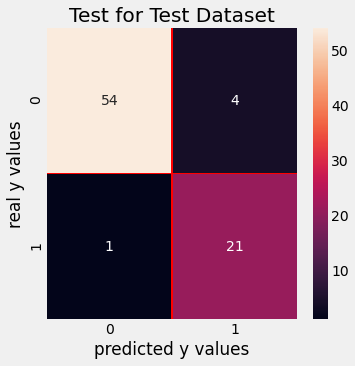

In [23]:
#from sklearn.metrics import confusion_matrix  #Class has capital at the begining function starts with small letters 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

To can refer to my other notebooks from https://www.kaggle.com/binuthomasphilip/code

### Accuracy Score K=5

In [24]:
print(accuracy_score(y_test,y_pred))

0.9375


### Classification Report K=5

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        58
           1       0.84      0.95      0.89        22

    accuracy                           0.94        80
   macro avg       0.91      0.94      0.92        80
weighted avg       0.94      0.94      0.94        80



So we can see that when we increased the K number from 1 to 5 the accuracy,Precision and Recall of the model have improved.

# 6.Conclusion:

1.KNN algorithm is used for classification.Here we have predicted purchase decision using KNN Algorithm.

2.In case of KNN algorithm the critical factor is to find out the optimum value of K.The optimum value of K results in better model performance.

3.We found out that K=5 is the optimum vale of K for this dataset.By using k=5 the accuracy of our model has increased from 91% to 93%.